# Caroline Barte
DSC 540 Final Project
8/7/2024

# Milestone 2

## Import the dataframe

In [420]:
import pandas as pd

In [421]:
df1 = pd.read_csv('Animation_movies.csv')

In [422]:
# To begin, I am looking at the dataframe columns to see if anything could be eliminated.
df1.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

## Transformations

### Transformation 1: Dropping columns 

Some of the columns will not aid me in my analysis, so I'm going to drop them from the dataframe.

In [423]:
df1 = df1.drop(columns=['id','tagline','adult','backdrop_path','homepage','original_title','overview','poster_path','tagline','production_companies','production_countries','imdb_id','spoken_languages'])

In [424]:
df1.columns

Index(['title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'original_language', 'popularity',
       'genres'],
      dtype='object')

In [425]:
df1.head(10)

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,175000000,en,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,Up,7.949,18857,Released,2009-05-28,735099082,96,175000000,en,90.968,"Animation, Comedy, Family, Adventure"
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,94000000,en,55.456,"Animation, Family"
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,175000000,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,180000000,en,58.517,"Animation, Family, Science Fiction"
5,"Monsters, Inc.",7.835,17189,Released,2001-11-01,579707738,92,115000000,en,86.936,"Animation, Comedy, Family"
6,Toy Story,7.971,17152,Released,1995-10-30,394400000,81,30000000,en,78.404,"Animation, Adventure, Family, Comedy"
7,The Lion King,8.256,16991,Released,1994-06-24,763455561,89,45000000,en,87.384,"Family, Animation, Drama"
8,The Incredibles,7.704,16584,Released,2004-10-27,631442092,115,92000000,en,62.609,"Action, Adventure, Animation, Family"
9,Shrek,7.730,15765,Released,2001-05-18,487853320,90,60000000,en,94.456,"Animation, Comedy, Fantasy, Adventure, Family"


### Transformation 2: English movies 

To keep the project in scope, I am going to only analyze films in english.

In [426]:
df1.shape[0]

51945

In [427]:
df1 = df1[df1['original_language'] == 'en']
df1.shape[0]

28584

In [428]:
51945 - 28584

23361

As shown, this transformation cut the amount of data almost in half.

### Transformation 3: Checking for null values

In [429]:
null_counts = df1.isnull().sum()
null_counts

title                   1
vote_average            0
vote_count              0
status                  0
release_date         1034
revenue                 0
runtime                 0
budget                  0
original_language       0
popularity              0
genres                  0
dtype: int64

In [430]:
# As shown, there are 0 null values for much of the df.
# I am removing the 1 value for 'title' and the 1034 for 'release_date' being NaN.
df1 = df1.dropna(subset=['release_date','title'])

In [431]:
print(df1.shape)

(27549, 11)


In [432]:
# There is still 27549 data points which can be used that are not null.

### Transformation 4: Converting Data Types

In [433]:
# Next, I am ensuring all dates are the correct data type for later analysis.
df1['release_date'] = pd.to_datetime(df1['release_date'])

In [434]:
df1

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,175000000,en,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,Up,7.949,18857,Released,2009-05-28,735099082,96,175000000,en,90.968,"Animation, Comedy, Family, Adventure"
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,94000000,en,55.456,"Animation, Family"
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,175000000,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,180000000,en,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...
51934,Story of the Christmas Toys,0.000,0,Released,1990-12-24,0,22,0,en,0.644,"Animation, Family"
51938,The Mushroom Hunters,0.000,0,Released,2019-11-26,0,6,0,en,0.600,Animation
51939,Migrante,0.000,0,Released,2019-06-26,0,6,0,en,0.851,Animation
51942,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,0,en,1.952,"Animation, Action, Science Fiction"


In [435]:
# Since this is the connecting variable between my sources,
# I am also ensuring all white space is stripped from the title
df1['title'] = df1['title'].str.strip()

In [436]:
df1.head(5)

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,175000000,en,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,Up,7.949,18857,Released,2009-05-28,735099082,96,175000000,en,90.968,"Animation, Comedy, Family, Adventure"
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,94000000,en,55.456,"Animation, Family"
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,175000000,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,180000000,en,58.517,"Animation, Family, Science Fiction"


### Transformation 5: Release Year

In [437]:
# I want to analyze release year only, so I am extracting that from the date.
df1['year'] = df1['release_date'].dt.year

In [438]:
# Then, I am dropping the column 'release date' to just show the year.
df1.drop(columns=['release_date'])

,title,vote_average,vote_count,status,revenue,runtime,budget,original_language,popularity,genres,year
0,Inside Out,7.922,19463,Released,857611174,95,175000000,en,107.292,"Animation, Family, Adventure, Drama, Comedy",2015
1,Up,7.949,18857,Released,735099082,96,175000000,en,90.968,"Animation, Comedy, Family, Adventure",2009
2,Finding Nemo,7.824,18061,Released,940335536,100,94000000,en,55.456,"Animation, Family",2003
3,Coco,8.222,17742,Released,800526015,105,175000000,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...",2017
4,WALL·E,8.078,17446,Released,521311860,98,180000000,en,58.517,"Animation, Family, Science Fiction",2008
...,...,...,...,...,...,...,...,...,...,...,...
51934,Story of the Christmas Toys,0.000,0,Released,0,22,0,en,0.644,"Animation, Family",1990
51938,The Mushroom Hunters,0.000,0,Released,0,6,0,en,0.600,Animation,2019
51939,Migrante,0.000,0,Released,0,6,0,en,0.851,Animation,2019
51942,Robo Force: The Revenge of Nazgar,0.000,0,Released,0,22,0,en,1.952,"Animation, Action, Science Fiction",1984


### Transformation 6: Title

In [439]:
# Since the title is the connecting variable, I am removing punctuation and capitalization

In [440]:
import string

In [441]:
def clean_title(title):
    title = title.lower()
    title = title.translate(str.maketrans('', '', string.punctuation))
    return title

In [442]:
df1['title'] = df1['title'].apply(clean_title)

In [443]:
df1['title']

0                                               inside out
1                                                       up
2                                             finding nemo
3                                                     coco
4                                                   wall·e
                               ...                        
51934                          story of the christmas toys
51938                                 the mushroom hunters
51939                                             migrante
51942                     robo force the revenge of nazgar
51943    beginning responsibility a lunchroom goes bananas
Name: title, Length: 27549, dtype: object

## Human Readable Dataset

In [444]:
df1

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres,year
0,inside out,7.922,19463,Released,2015-06-09,857611174,95,175000000,en,107.292,"Animation, Family, Adventure, Drama, Comedy",2015
1,up,7.949,18857,Released,2009-05-28,735099082,96,175000000,en,90.968,"Animation, Comedy, Family, Adventure",2009
2,finding nemo,7.824,18061,Released,2003-05-30,940335536,100,94000000,en,55.456,"Animation, Family",2003
3,coco,8.222,17742,Released,2017-10-27,800526015,105,175000000,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...",2017
4,wall·e,8.078,17446,Released,2008-06-22,521311860,98,180000000,en,58.517,"Animation, Family, Science Fiction",2008
...,...,...,...,...,...,...,...,...,...,...,...,...
51934,story of the christmas toys,0.000,0,Released,1990-12-24,0,22,0,en,0.644,"Animation, Family",1990
51938,the mushroom hunters,0.000,0,Released,2019-11-26,0,6,0,en,0.600,Animation,2019
51939,migrante,0.000,0,Released,2019-06-26,0,6,0,en,0.851,Animation,2019
51942,robo force the revenge of nazgar,0.000,0,Released,1984-12-08,0,22,0,en,1.952,"Animation, Action, Science Fiction",1984


## Ethical Implications

There were five changes that were made to my data, each one simplified the data frame to use with further analysis. These transformations included dropping unnecessary columns, keeping the project in scope by using only English movies, checking for null values, converting data types, and simplifying the data to only include release year. Since my analysis is including movies, there are no legal guidelines for my topic. There are not many risks which can be associated with my project topic, as I think all of the transformations done were done to keep my project in scope. I did not make any assumptions when transforming this data. My data was sourced directly from TMDB, which is an incredibly reliable source and all data was acquired ethically. The only issue I had when transforming values was when I checked for null values in my data set. There were 1034 data points which lacked a value for release date. For my analysis, it would be incredibly time consuming to search all these movies and insert release dates, so I removed those data points. That cut my data frame almost in half, which gives me less data to work with in the long run.

# Milestone 3

## Import the dataframe

In [445]:
# Import the website as html
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_animated_films#Computer_animation"
tables = pd.read_html(url)

In [446]:
# Print how many tables are found on the page
len(tables)

56

In [447]:
# Since there are 56 tables, I wanted to narrow it down to the table I wanted.
for table in tables:
    if "Worldwide gross" in table.columns:
        df = table
        break

In [448]:
df.head(5)

,Rank,Title,Worldwide gross,Year,Reference(s)
0,1,The Lion King (2019)[nb 2],"$1,663,079,059",2019,[# 1][7][8]
1,2,Inside Out 2 †,"$1,559,897,158",2024,[# 2][# 3]
2,3,Frozen II,"$1,453,683,476",2019,[# 4][# 5]
3,4,The Super Mario Bros. Movie,"$1,361,992,475",2023,[# 6][# 7]
4,5,Frozen,"$1,290,000,000",2013,[# 8]


## Transformation 1: Remove reference column

In [449]:
# This column is not needed in my analysis
df = df.drop(columns=['Reference(s)'])

In [450]:
df.columns

Index(['Rank', 'Title', 'Worldwide gross', 'Year'], dtype='object')

## Transformation 2: Remove rank column

In [451]:
# This column is not needed in my analysis
df = df.drop(columns=['Rank'])
df.columns

Index(['Title', 'Worldwide gross', 'Year'], dtype='object')

## Transformation 3: Drop NaN Values

In [452]:
df.dropna(inplace=True)

In [453]:
df.shape

(50, 3)

In [454]:
# As shown, dropping NaN values did not remove of the data.

## Transformation 4: Converting worldwide gross

In [455]:
df.head(5)

,Title,Worldwide gross,Year
0,The Lion King (2019)[nb 2],"$1,663,079,059",2019
1,Inside Out 2 †,"$1,559,897,158",2024
2,Frozen II,"$1,453,683,476",2019
3,The Super Mario Bros. Movie,"$1,361,992,475",2023
4,Frozen,"$1,290,000,000",2013


In [456]:
# I want to remove the commas and dollar signs from the worldwide gross column
df['Worldwide gross'] = df['Worldwide gross'].str.replace('$', '').str.replace(',', '')

In [457]:
df.head(5)

,Title,Worldwide gross,Year
0,The Lion King (2019)[nb 2],1663079059,2019
1,Inside Out 2 †,1559897158,2024
2,Frozen II,1453683476,2019
3,The Super Mario Bros. Movie,1361992475,2023
4,Frozen,1290000000,2013


## Transformation 5: Changing the movie names

In [458]:
# To begin, I made the titles lowercase
df['Title'] = df['Title'].str.lower()

In [459]:
df.head(5)

,Title,Worldwide gross,Year
0,the lion king (2019)[nb 2],1663079059,2019
1,inside out 2 †,1559897158,2024
2,frozen ii,1453683476,2019
3,the super mario bros. movie,1361992475,2023
4,frozen,1290000000,2013


In [460]:
# Remove punctuation from titles
import re
df['Title'] = df['Title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [461]:
df.head(10)

,Title,Worldwide gross,Year
0,the lion king 2019nb 2,1663079059,2019
1,inside out 2,1559897158,2024
2,frozen ii,1453683476,2019
3,the super mario bros movie,1361992475,2023
4,frozen,1290000000,2013
5,incredibles 2,1242805359,2018
6,minions,1159398397,2015
7,toy story 4,1073394593,2019
8,toy story 3,1066969703,2010
9,despicable me 3,1034799409,2017


## Transformation 6: Changing column name

In [462]:
# For simplicity, I am changing 'worldwide gross' to just 'gross'
df.rename(columns={'Worldwide gross': 'Gross'}, inplace=True)

In [463]:
df.columns

Index(['Title', 'Gross', 'Year'], dtype='object')

## Final Results: Readable Dataset

In [464]:
df.head(25)

,Title,Gross,Year
0,the lion king 2019nb 2,1663079059,2019
1,inside out 2,1559897158,2024
2,frozen ii,1453683476,2019
3,the super mario bros movie,1361992475,2023
4,frozen,1290000000,2013
5,incredibles 2,1242805359,2018
6,minions,1159398397,2015
7,toy story 4,1073394593,2019
8,toy story 3,1066969703,2010
9,despicable me 3,1034799409,2017


## Final Thoughts

For my transformations, I made some basic changes such as changing names of columns and ensuring that the monetary gross was displayed in the correct way. Since the movie titles are the variable which will connect my three data sets, the most important thing with this step was to ensure the movie titles were in the correct format. I did this by removing punctuation and ensuring they were lowercase. Since most of these transformations were simple name changes, there are no risks that could be created based on the transformation. Also since I checked for empty values, I did not make any assumptions when transforming the data. My data was acquired using Wikipedia, which is an ethically sourced website.

 I am happy with how my dataset was transformed and I think it is adequate for the next step in my analysis. However, what stood out to me when doing my transformations is the lack of values in my dataset table. For this resource, I only have 50 entries in my table. There are 56 total tables on my website, so I am going to look into combining a few to ensure I have more entries. If I choose to combine them, I would still transform them using the same steps I used in this assignment. 

# Milestone 3.5

Since Milestone 4 searches movie data for a list of titles, I want to search the data for the list of titles in Milestone 3. To do this, I need to convert the titles from Milestone 3 into a list. Then, I can connect the steps.

Also, I am removing the first entry as the title makes it diffucult to connect it to the other sources (the lion king 2019nb 2)

In [465]:
df.drop(df.index[0])
df.head(5)

,Title,Gross,Year
0,the lion king 2019nb 2,1663079059,2019
1,inside out 2,1559897158,2024
2,frozen ii,1453683476,2019
3,the super mario bros movie,1361992475,2023
4,frozen,1290000000,2013


In [466]:
titles_list = df['Title'].tolist()
print(titles_list)

['the lion king 2019nb 2', 'inside out 2 ', 'frozen ii', 'the super mario bros movie', 'frozen', 'incredibles 2', 'minions', 'toy story 4', 'toy story 3', 'despicable me 3', 'finding dory', 'zootopia', 'the lion king 1994 ', 'despicable me 2', 'minions the rise of gru', 'finding nemo', 'shrek 2', 'ice age dawn of the dinosaurs', 'ice age continental drift', 'the secret life of pets', 'inside out', 'shrek the third', 'coco', 'despicable me 4 ', 'shrek forever after', 'madagascar 3 europes most wanted', 'monsters university', 'ne zha', 'up', 'spiderman across the spiderverse', 'kung fu panda 2', 'ice age the meltdown', 'big hero 6', 'moana', 'sing', 'kung fu panda', 'the incredibles', 'ratatouille', 'how to train your dragon 2', 'madagascar escape 2 africa', 'tangled', 'the croods', 'monsters inc', 'cars 2', 'puss in boots', 'kung fu panda 4', 'despicable me', 'madagascar', 'brave', 'the simpsons movie']


# Milestone 4

To begin this project, I had to connect with my API outlined in my first step of this project. However, upon researching further, this API could only be used for commercial use, so I am using the OMDB api instead. It contains identical data. This is further discussed at the end of this document.

## Imports and creating intro functions

In [467]:
import requests
import json

Function to get data

In [468]:
with open('APIkeys.json', 'r') as file:
    config = json.load(file)
    api_key = config['OMDBapi']

OMDB_API_URL = 'http://www.omdbapi.com/'

In [469]:
def fetch_movie_data(title):
    params = {
        'apikey': api_key,
        't': title
    }
    
    response = requests.get(OMDB_API_URL, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data['Response'] == 'True':
            return data
        else:
            return {'Error': data['Error']}
    else:
        return {'Error': 'Unable to fetch data'}

Create a function to fetch the data for movie titles

To see the data my api returns, I am using one simple title. For my final project once I combine the sources, I am going to copy the list of titles acquired from my source in milestone 2.

In [470]:
titles = titles_list

In [471]:
movie_data_list = []

for title in titles:
    movie_data = fetch_movie_data(title)
    movie_data_list.append(movie_data)

for movie_data in movie_data_list:
    print(json.dumps(movie_data, indent=4))

{
    "Error": "Movie not found!"
}
{
    "Title": "Inside Out 2",
    "Year": "2024",
    "Rated": "PG",
    "Released": "14 Jun 2024",
    "Runtime": "96 min",
    "Genre": "Animation, Adventure, Comedy",
    "Director": "Kelsey Mann",
    "Writer": "Meg LeFauve, Dave Holstein, Kelsey Mann",
    "Actors": "Amy Poehler, Maya Hawke, Kensington Tallman",
    "Plot": "A sequel that features Riley entering puberty and experiencing brand new, more complex emotions as a result. As Riley tries to adapt to her teenage years, her old emotions try to adapt to the possibility of being replaced.",
    "Language": "English",
    "Country": "United States, Japan",
    "Awards": "2 nominations",
    "Poster": "https://m.media-amazon.com/images/M/MV5BYTc1MDQ3NjAtOWEzMi00YzE1LWI2OWUtNjQ0OWJkMzI3MDhmXkEyXkFqcGdeQXVyMDM2NDM2MQ@@._V1_SX300.jpg",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "7.8/10"
        },
        {
            "Source": "Rotten Toma

## Transformations

### 1: Removing values

Now that my data is organized into a dictionary, I want to see which values can be removed.

In [472]:
movie_data.keys()

dict_keys(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'])

I am going to remove the following entries, as I do not find them useful for my analysis.

'Director', 'Writer', 'Actors', 'Plot', 'Awards', 'Poster', 'Ratings', 'imdbID', 'DVD', 'BoxOffice', 'Production', 'Website'

In [473]:
keys_to_remove = ['Director', 'Writer', 'Actors', 'Plot', 'Awards', 'Poster', 'Ratings', 'imdbID', 'DVD', 'BoxOffice', 'Production', 'Website']

for key in keys_to_remove:
    if key in movie_data:
        movie_data.pop(key, None) 

In [474]:
movie_data.keys()

dict_keys(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Language', 'Country', 'Metascore', 'imdbRating', 'imdbVotes', 'Type', 'Response'])

Since in Milestone 2 I already have the release year, I am removing the Year and Released date as well.

In [475]:
keys_to_remove = ['Year', 'Released']

for key in keys_to_remove:
    if key in movie_data:
        movie_data.pop(key, None)

In [476]:
movie_data.keys()

dict_keys(['Title', 'Rated', 'Runtime', 'Genre', 'Language', 'Country', 'Metascore', 'imdbRating', 'imdbVotes', 'Type', 'Response'])

In [477]:
movie_data

{'Title': 'The Simpsons Movie',
 'Rated': 'PG-13',
 'Runtime': '87 min',
 'Genre': 'Animation, Adventure, Comedy',
 'Language': 'English',
 'Country': 'United States',
 'Metascore': '80',
 'imdbRating': '7.3',
 'imdbVotes': '351,232',
 'Type': 'movie',
 'Response': 'True'}

### 2: Lowercase Title

Since the title will link my sources, I want to make the titles lowercase like the previous milestones

In [478]:
movie_data['Title'] = movie_data['Title'].lower()

In [479]:
movie_data

{'Title': 'the simpsons movie',
 'Rated': 'PG-13',
 'Runtime': '87 min',
 'Genre': 'Animation, Adventure, Comedy',
 'Language': 'English',
 'Country': 'United States',
 'Metascore': '80',
 'imdbRating': '7.3',
 'imdbVotes': '351,232',
 'Type': 'movie',
 'Response': 'True'}

### 3: Title Cleaning

I also want to remove all punctuation from the titles

In [480]:
import string

In [481]:
movie_data['Title'] = movie_data['Title'].translate(str.maketrans('', '', string.punctuation))

### 4: Runtime

For my analysis, I want to ensure the runtime (in this example, 100 min) is printed as 100, so I can make it a numerical value in the next transformation.

In [482]:
movie_data['Runtime'] = movie_data['Runtime'].replace(' min', '')

In [483]:
movie_data

{'Title': 'the simpsons movie',
 'Rated': 'PG-13',
 'Runtime': '87',
 'Genre': 'Animation, Adventure, Comedy',
 'Language': 'English',
 'Country': 'United States',
 'Metascore': '80',
 'imdbRating': '7.3',
 'imdbVotes': '351,232',
 'Type': 'movie',
 'Response': 'True'}

### 5: Making Runtime Numerical

In [484]:
movie_data['Runtime'] = int(movie_data['Runtime'])

In [485]:
type(movie_data['Runtime'])

int

As shown, it is now an integer value, which will be easier for analysis.

### 6: Checking for N/A Values

In this API, any value which does not have an entry is printed N/A. I am checking for those below.

In [486]:
na_values = {key: value for key, value in movie_data.items() if value == 'N/A'}
print("N/A values found:")
print(na_values)

N/A values found:
{}


If there any values with N/A, the code will drop them from the dictionary using the process below.

In [487]:
movie_data = {key: value for key, value in movie_data.items() if value != 'N/A'}

### 7: Data Type of Numerical Values

In [488]:
type(movie_data['Metascore'])
type(movie_data['imdbRating'])
type(movie_data['imdbVotes'])

str

I want to convert them all to either int or float values to analyze them later on. Also, I wanted to remove commas from indbVotes.

In [489]:
movie_data['Metascore'] = int(movie_data['Metascore'])
movie_data['imdbRating'] = float(movie_data['imdbRating'])
movie_data['imdbVotes'] = int(movie_data['imdbVotes'].replace(',', ''))

In [490]:
type(movie_data['Metascore'])
type(movie_data['imdbRating'])
type(movie_data['imdbVotes'])

int

## Human Readable Dataset

In [491]:
movie_data

{'Title': 'the simpsons movie',
 'Rated': 'PG-13',
 'Runtime': 87,
 'Genre': 'Animation, Adventure, Comedy',
 'Language': 'English',
 'Country': 'United States',
 'Metascore': 80,
 'imdbRating': 7.3,
 'imdbVotes': 351232,
 'Type': 'movie',
 'Response': 'True'}

## Convert to DataFrame

In [492]:
movie_data_list = movie_data_list[1:]

In [493]:
movie_data_list

[{'Title': 'Inside Out 2',
  'Year': '2024',
  'Rated': 'PG',
  'Released': '14 Jun 2024',
  'Runtime': '96 min',
  'Genre': 'Animation, Adventure, Comedy',
  'Director': 'Kelsey Mann',
  'Writer': 'Meg LeFauve, Dave Holstein, Kelsey Mann',
  'Actors': 'Amy Poehler, Maya Hawke, Kensington Tallman',
  'Plot': 'A sequel that features Riley entering puberty and experiencing brand new, more complex emotions as a result. As Riley tries to adapt to her teenage years, her old emotions try to adapt to the possibility of being replaced.',
  'Language': 'English',
  'Country': 'United States, Japan',
  'Awards': '2 nominations',
  'Poster': 'https://m.media-amazon.com/images/M/MV5BYTc1MDQ3NjAtOWEzMi00YzE1LWI2OWUtNjQ0OWJkMzI3MDhmXkEyXkFqcGdeQXVyMDM2NDM2MQ@@._V1_SX300.jpg',
  'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
   {'Source': 'Rotten Tomatoes', 'Value': '91%'}],
  'Metascore': 'N/A',
  'imdbRating': '7.8',
  'imdbVotes': '82,112',
  'imdbID': 'tt22022452',
  'Type'

In [494]:
for movie in movie_data_list:
    if 'Ratings' in movie:
        del movie['Ratings']

In [495]:
movie_data_list

[{'Title': 'Inside Out 2',
  'Year': '2024',
  'Rated': 'PG',
  'Released': '14 Jun 2024',
  'Runtime': '96 min',
  'Genre': 'Animation, Adventure, Comedy',
  'Director': 'Kelsey Mann',
  'Writer': 'Meg LeFauve, Dave Holstein, Kelsey Mann',
  'Actors': 'Amy Poehler, Maya Hawke, Kensington Tallman',
  'Plot': 'A sequel that features Riley entering puberty and experiencing brand new, more complex emotions as a result. As Riley tries to adapt to her teenage years, her old emotions try to adapt to the possibility of being replaced.',
  'Language': 'English',
  'Country': 'United States, Japan',
  'Awards': '2 nominations',
  'Poster': 'https://m.media-amazon.com/images/M/MV5BYTc1MDQ3NjAtOWEzMi00YzE1LWI2OWUtNjQ0OWJkMzI3MDhmXkEyXkFqcGdeQXVyMDM2NDM2MQ@@._V1_SX300.jpg',
  'Metascore': 'N/A',
  'imdbRating': '7.8',
  'imdbVotes': '82,112',
  'imdbID': 'tt22022452',
  'Type': 'movie',
  'DVD': 'N/A',
  'BoxOffice': '$596,375,604',
  'Production': 'N/A',
  'Website': 'N/A',
  'Response': 'True'},

In [496]:
for movie in movie_data_list:
    if 'Title' in movie:
        movie['Title'] = movie['Title'].lower()
    else:
        print("No 'Title' key found in:", movie)

No 'Title' key found in: {'Error': 'Movie not found!'}
No 'Title' key found in: {'Error': 'Movie not found!'}
No 'Title' key found in: {'Error': 'Movie not found!'}


In [497]:
df2 = pd.DataFrame(movie_data_list)

In [498]:
df2.head(5)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,inside out 2,2024,PG,14 Jun 2024,96 min,"Animation, Adventure, Comedy",Kelsey Mann,"Meg LeFauve, Dave Holstein, Kelsey Mann","Amy Poehler, Maya Hawke, Kensington Tallman",A sequel that features Riley entering puberty ...,...,7.8,"82,112",tt22022452,movie,N/A,"$596,375,604",N/A,N/A,True,NaN
1,frozen ii,2019,PG,22 Nov 2019,103 min,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen, Chris Buck","Kristen Bell, Idina Menzel, Josh Gad","Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",...,6.8,"197,344",tt4520988,movie,N/A,"$477,373,578",N/A,N/A,True,NaN
2,the super mario bros. movie,2023,PG,05 Apr 2023,92 min,"Animation, Adventure, Comedy","Aaron Horvath, Michael Jelenic, Pierre Leduc",Matthew Fogel,"Chris Pratt, Anya Taylor-Joy, Charlie Day",A plumber named Mario travels through an under...,...,7.0,"243,742",tt6718170,movie,N/A,"$574,934,330",N/A,N/A,True,NaN
3,frozen,2013,PG,27 Nov 2013,102 min,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen, Chris Buck","Kristen Bell, Idina Menzel, Jonathan Groff",Fearless optimist Anna teams up with rugged mo...,...,7.4,"668,349",tt2294629,movie,N/A,"$400,953,009",N/A,N/A,True,NaN
4,incredibles 2,2018,PG,15 Jun 2018,118 min,"Animation, Action, Adventure",Brad Bird,Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell",The Incredibles family takes on a new mission ...,...,7.5,"334,097",tt3606756,movie,N/A,"$608,581,744",N/A,N/A,True,NaN


In [499]:
df2.drop(['Error','Released','Plot','Metascore','DVD','Production','Website','Response','Type','Ratings','Poster'], axis=1)

KeyError: "['Ratings'] not found in axis"

## Final Thoughts

There were many introductory steps I took when changing my data, most of them being repeated from my past two sources. For my project, the most important step in this milestone was to ensure that the title of the movies were all in lower case, with no punctuation. Although I do not think it is common for all of my sources to title movies differently, this was a cautionary step which will error proof my final project. Like my other milestones there were minimal ethical implications and legal guidelines for my project. I did not make any assumptions in cleaning or transforming the data in this step.

The most difficult roadblock for me was at the beginning of this milestone, when I accessed my API first outlined in milestone one. This API was only available for commercial use, so I switched to a different one. In terms of my project this was an improvement, as the API I am using currently includes more reviews, languages, and other information which will be beneficial in my analysis. 

For the next step of my project, I am looking forward to combining milestones 3 and 4. I am planning on taking the list of titles I acquired in the previous milestone and the code I created in this milestone to create my final project.

# Milestone 5

## Load each file into a database

### CSV file

In [ ]:
df1

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('database.db')

In [ ]:
df1.to_sql('CSVData', conn, if_exists='replace', index=False)

In [ ]:
# Checking result
result = pd.read_sql_query('SELECT * FROM CSVData', conn)

In [ ]:
result

### HTML file

In [ ]:
df

In [ ]:
df.to_sql('HTMLData', conn, if_exists='replace', index=False)

In [ ]:
# Checking result
result = pd.read_sql_query('SELECT * FROM HTMLData', conn)

In [ ]:
result

### API file

In [500]:
df2

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,inside out 2,2024,PG,14 Jun 2024,96 min,"Animation, Adventure, Comedy",Kelsey Mann,"Meg LeFauve, Dave Holstein, Kelsey Mann","Amy Poehler, Maya Hawke, Kensington Tallman",A sequel that features Riley entering puberty ...,...,7.8,"82,112",tt22022452,movie,N/A,"$596,375,604",N/A,N/A,True,NaN
1,frozen ii,2019,PG,22 Nov 2019,103 min,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen, Chris Buck","Kristen Bell, Idina Menzel, Josh Gad","Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",...,6.8,"197,344",tt4520988,movie,N/A,"$477,373,578",N/A,N/A,True,NaN
2,the super mario bros. movie,2023,PG,05 Apr 2023,92 min,"Animation, Adventure, Comedy","Aaron Horvath, Michael Jelenic, Pierre Leduc",Matthew Fogel,"Chris Pratt, Anya Taylor-Joy, Charlie Day",A plumber named Mario travels through an under...,...,7.0,"243,742",tt6718170,movie,N/A,"$574,934,330",N/A,N/A,True,NaN
3,frozen,2013,PG,27 Nov 2013,102 min,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen, Chris Buck","Kristen Bell, Idina Menzel, Jonathan Groff",Fearless optimist Anna teams up with rugged mo...,...,7.4,"668,349",tt2294629,movie,N/A,"$400,953,009",N/A,N/A,True,NaN
4,incredibles 2,2018,PG,15 Jun 2018,118 min,"Animation, Action, Adventure",Brad Bird,Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell",The Incredibles family takes on a new mission ...,...,7.5,"334,097",tt3606756,movie,N/A,"$608,581,744",N/A,N/A,True,NaN
5,minions,2015,PG,10 Jul 2015,91 min,"Animation, Adventure, Comedy","Kyle Balda, Pierre Coffin",Brian Lynch,"Sandra Bullock, Jon Hamm, Michael Keaton","Minions Stuart, Kevin, and Bob are recruited b...",...,6.4,"261,527",tt2293640,movie,N/A,"$336,045,770",N/A,N/A,True,NaN
6,toy story 4,2019,G,21 Jun 2019,100 min,"Animation, Adventure, Comedy",Josh Cooley,"John Lasseter, Andrew Stanton, Josh Cooley","Tom Hanks, Tim Allen, Annie Potts","When a new toy called ""Forky"" joins Woody and ...",...,7.7,"284,035",tt1979376,movie,N/A,"$434,038,008",N/A,N/A,True,NaN
7,toy story 3,2010,G,29 Jun 2010,103 min,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,8.3,"898,166",tt0435761,movie,N/A,"$415,004,880",N/A,N/A,True,NaN
8,despicable me 3,2017,PG,30 Jun 2017,89 min,"Animation, Adventure, Comedy","Kyle Balda, Pierre Coffin, Eric Guillon","Cinco Paul, Ken Daurio","Steve Carell, Kristen Wiig, Trey Parker","Gru meets his long-lost, charming, cheerful, a...",...,6.2,"157,080",tt3469046,movie,N/A,"$264,624,300",N/A,N/A,True,NaN
9,finding dory,2016,PG,17 Jun 2016,97 min,"Animation, Adventure, Comedy","Andrew Stanton, Angus MacLane","Andrew Stanton, Victoria Strouse","Ellen DeGeneres, Albert Brooks, Ed O'Neill",Friendly but forgetful blue tang Dory begins a...,...,7.2,"307,251",tt2277860,movie,N/A,"$486,295,561",N/A,N/A,True,NaN


In [501]:
df2.to_sql('APIData', conn, if_exists='replace', index=False)

49

In [502]:
# Checking result
result = pd.read_sql_query('SELECT * FROM APIData', conn)

In [503]:
result

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,inside out 2,2024,PG,14 Jun 2024,96 min,"Animation, Adventure, Comedy",Kelsey Mann,"Meg LeFauve, Dave Holstein, Kelsey Mann","Amy Poehler, Maya Hawke, Kensington Tallman",A sequel that features Riley entering puberty ...,...,7.8,"82,112",tt22022452,movie,N/A,"$596,375,604",N/A,N/A,True,None
1,frozen ii,2019,PG,22 Nov 2019,103 min,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen, Chris Buck","Kristen Bell, Idina Menzel, Josh Gad","Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",...,6.8,"197,344",tt4520988,movie,N/A,"$477,373,578",N/A,N/A,True,None
2,the super mario bros. movie,2023,PG,05 Apr 2023,92 min,"Animation, Adventure, Comedy","Aaron Horvath, Michael Jelenic, Pierre Leduc",Matthew Fogel,"Chris Pratt, Anya Taylor-Joy, Charlie Day",A plumber named Mario travels through an under...,...,7.0,"243,742",tt6718170,movie,N/A,"$574,934,330",N/A,N/A,True,None
3,frozen,2013,PG,27 Nov 2013,102 min,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen, Chris Buck","Kristen Bell, Idina Menzel, Jonathan Groff",Fearless optimist Anna teams up with rugged mo...,...,7.4,"668,349",tt2294629,movie,N/A,"$400,953,009",N/A,N/A,True,None
4,incredibles 2,2018,PG,15 Jun 2018,118 min,"Animation, Action, Adventure",Brad Bird,Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell",The Incredibles family takes on a new mission ...,...,7.5,"334,097",tt3606756,movie,N/A,"$608,581,744",N/A,N/A,True,None
5,minions,2015,PG,10 Jul 2015,91 min,"Animation, Adventure, Comedy","Kyle Balda, Pierre Coffin",Brian Lynch,"Sandra Bullock, Jon Hamm, Michael Keaton","Minions Stuart, Kevin, and Bob are recruited b...",...,6.4,"261,527",tt2293640,movie,N/A,"$336,045,770",N/A,N/A,True,None
6,toy story 4,2019,G,21 Jun 2019,100 min,"Animation, Adventure, Comedy",Josh Cooley,"John Lasseter, Andrew Stanton, Josh Cooley","Tom Hanks, Tim Allen, Annie Potts","When a new toy called ""Forky"" joins Woody and ...",...,7.7,"284,035",tt1979376,movie,N/A,"$434,038,008",N/A,N/A,True,None
7,toy story 3,2010,G,29 Jun 2010,103 min,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,8.3,"898,166",tt0435761,movie,N/A,"$415,004,880",N/A,N/A,True,None
8,despicable me 3,2017,PG,30 Jun 2017,89 min,"Animation, Adventure, Comedy","Kyle Balda, Pierre Coffin, Eric Guillon","Cinco Paul, Ken Daurio","Steve Carell, Kristen Wiig, Trey Parker","Gru meets his long-lost, charming, cheerful, a...",...,6.2,"157,080",tt3469046,movie,N/A,"$264,624,300",N/A,N/A,True,None
9,finding dory,2016,PG,17 Jun 2016,97 min,"Animation, Adventure, Comedy","Andrew Stanton, Angus MacLane","Andrew Stanton, Victoria Strouse","Ellen DeGeneres, Albert Brooks, Ed O'Neill",Friendly but forgetful blue tang Dory begins a...,...,7.2,"307,251",tt2277860,movie,N/A,"$486,295,561",N/A,N/A,True,None


## Combine all datasets into one

In [504]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

       name
0       df1
1   CSVData
2  HTMLData
3   APIData


In [511]:
moviedf = pd.read_sql_query("select * from CSVData INNER JOIN HTMLData ON CSVData.title = HTMLData.Title INNER JOIN APIData ON CSVData.title = APIData.Title", con=conn)

In [512]:
moviedf

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,inside out,7.922,19463,Released,2015-06-09 00:00:00,857611174,95,175000000,en,107.292,...,8.1,"808,999",tt2096673,movie,N/A,"$356,921,711",N/A,N/A,True,None
1,up,7.949,18857,Released,2009-05-28 00:00:00,735099082,96,175000000,en,90.968,...,8.3,"1,136,130",tt1049413,movie,N/A,"$293,004,164",N/A,N/A,True,None
2,finding nemo,7.824,18061,Released,2003-05-30 00:00:00,940335536,100,94000000,en,55.456,...,8.2,"1,120,654",tt0266543,movie,N/A,"$380,843,261",N/A,N/A,True,None
3,coco,8.222,17742,Released,2017-10-27 00:00:00,800526015,105,175000000,en,166.578,...,8.4,"602,380",tt2380307,movie,N/A,"$210,460,015",N/A,N/A,True,None
4,the incredibles,7.704,16584,Released,2004-10-27 00:00:00,631442092,115,92000000,en,62.609,...,8.0,"816,570",tt0317705,movie,29 Mar 2005,"$261,441,092",N/A,N/A,True,None
5,ratatouille,7.809,15728,Released,2007-06-28 00:00:00,623726000,111,150000000,en,82.488,...,8.1,"834,765",tt0382932,movie,N/A,"$206,445,654",N/A,N/A,True,None
6,frozen,7.200,15520,Released,2013-11-20 00:00:00,1274219009,102,150000000,en,85.794,...,7.4,"668,349",tt2294629,movie,N/A,"$400,953,009",N/A,N/A,True,None
7,zootopia,7.748,15230,Released,2016-02-11 00:00:00,1023784195,109,150000000,en,98.110,...,8.0,"553,508",tt2948356,movie,N/A,"$341,268,248",N/A,N/A,True,None
8,big hero 6,7.738,14732,Released,2014-10-24 00:00:00,657827828,102,165000000,en,98.410,...,7.8,"507,210",tt2245084,movie,N/A,"$222,527,828",N/A,N/A,True,None
9,despicable me,7.227,14147,Released,2010-07-08 00:00:00,533679475,95,69000000,en,47.416,...,7.6,"588,294",tt1323594,movie,N/A,"$251,683,815",N/A,N/A,True,None


## Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. 

### 1: Vote Score and Revenue

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns

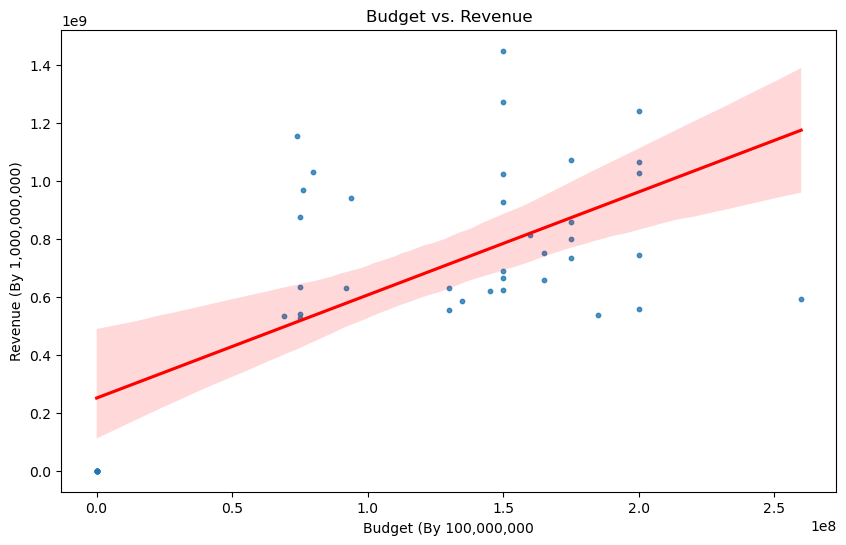

In [520]:
plt.figure(figsize=(10, 6))
sns.regplot(data=moviedf, x='budget', y='revenue', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (By 100,000,000')
plt.ylabel('Revenue (By 1,000,000,000)')
plt.show()

This shows a positive relationship between budget and revenue, usually the higher the budget, the higher the revenue. 

### 2: Movie Runtime and Vote Average

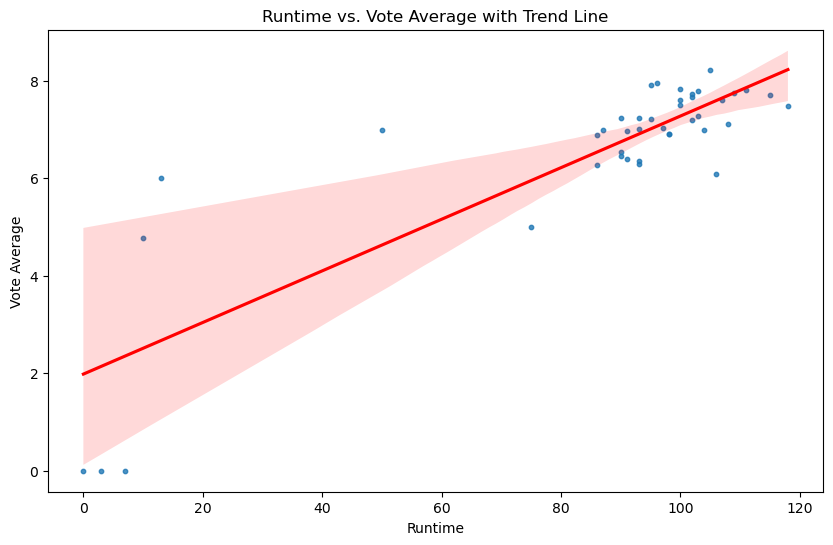

In [521]:
plt.figure(figsize=(10, 6))
sns.regplot(data=moviedf, x='runtime', y='vote_average', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Runtime vs. Vote Average with Trend Line')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.show()

As shown, movies with a higher runtime have a higher average rating

### 3: Vote Average and Budget

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


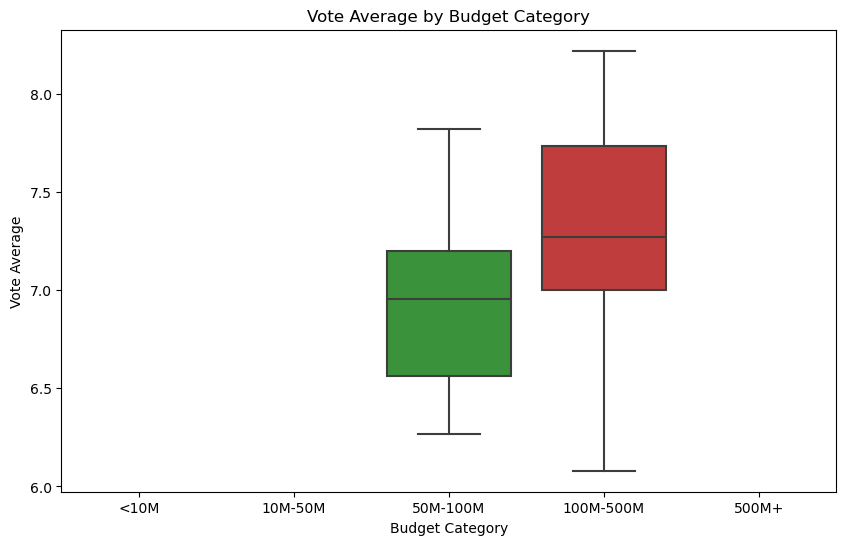

In [522]:
plt.figure(figsize=(10, 6))
budget_bins = pd.cut(moviedf['budget'], bins=[0, 1e7, 5e7, 1e8, 5e8, 1e9], labels=['<10M', '10M-50M', '50M-100M', '100M-500M', '500M+'])
sns.boxplot(data=moviedf, x=budget_bins, y='vote_average')
plt.title('Vote Average by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Vote Average')
plt.show()

As shown by the box plot above, movies which have a higher budget have higher ratings with viewers. 

### 4: Histogram of Revenue

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


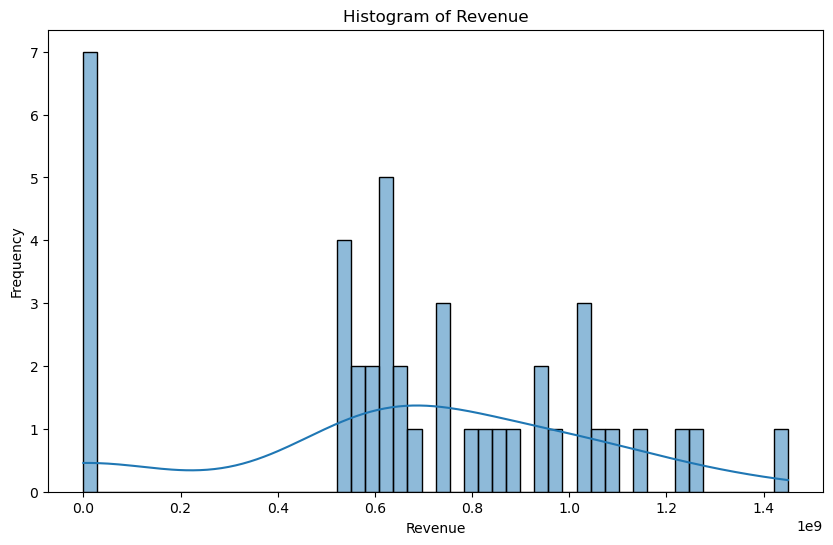

In [524]:
plt.figure(figsize=(10, 6))
sns.histplot(moviedf['revenue'], bins=50, kde=True)
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

Most movies make 600000000 to 1200000000 dollars of revenue during their release.

### 5: Heatmap

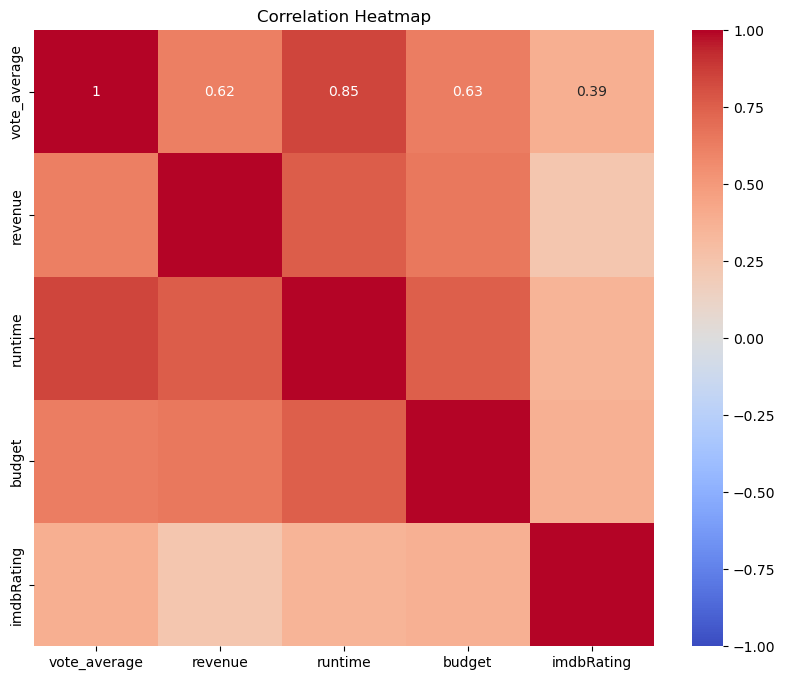

In [527]:
plt.figure(figsize=(10, 8))
corr = moviedf[['vote_average', 'revenue', 'runtime', 'budget', 'imdbRating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

When looking at the heatmap, the IMDBrating has the least amount of influence on revenue. 

# Final Human Readable Dataset

In [528]:
moviedf

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,inside out,7.922,19463,Released,2015-06-09 00:00:00,857611174,95,175000000,en,107.292,...,8.1,"808,999",tt2096673,movie,N/A,"$356,921,711",N/A,N/A,True,None
1,up,7.949,18857,Released,2009-05-28 00:00:00,735099082,96,175000000,en,90.968,...,8.3,"1,136,130",tt1049413,movie,N/A,"$293,004,164",N/A,N/A,True,None
2,finding nemo,7.824,18061,Released,2003-05-30 00:00:00,940335536,100,94000000,en,55.456,...,8.2,"1,120,654",tt0266543,movie,N/A,"$380,843,261",N/A,N/A,True,None
3,coco,8.222,17742,Released,2017-10-27 00:00:00,800526015,105,175000000,en,166.578,...,8.4,"602,380",tt2380307,movie,N/A,"$210,460,015",N/A,N/A,True,None
4,the incredibles,7.704,16584,Released,2004-10-27 00:00:00,631442092,115,92000000,en,62.609,...,8.0,"816,570",tt0317705,movie,29 Mar 2005,"$261,441,092",N/A,N/A,True,None
5,ratatouille,7.809,15728,Released,2007-06-28 00:00:00,623726000,111,150000000,en,82.488,...,8.1,"834,765",tt0382932,movie,N/A,"$206,445,654",N/A,N/A,True,None
6,frozen,7.200,15520,Released,2013-11-20 00:00:00,1274219009,102,150000000,en,85.794,...,7.4,"668,349",tt2294629,movie,N/A,"$400,953,009",N/A,N/A,True,None
7,zootopia,7.748,15230,Released,2016-02-11 00:00:00,1023784195,109,150000000,en,98.110,...,8.0,"553,508",tt2948356,movie,N/A,"$341,268,248",N/A,N/A,True,None
8,big hero 6,7.738,14732,Released,2014-10-24 00:00:00,657827828,102,165000000,en,98.410,...,7.8,"507,210",tt2245084,movie,N/A,"$222,527,828",N/A,N/A,True,None
9,despicable me,7.227,14147,Released,2010-07-08 00:00:00,533679475,95,69000000,en,47.416,...,7.6,"588,294",tt1323594,movie,N/A,"$251,683,815",N/A,N/A,True,None


# Final Summary

To complete this project, I first found three data sources which all contain different data about movies. Then, I cleansed each data source, with the most important step involving the movie titles. Since the movie title was going to be the key which connected each data source at the end of my project, I wanted to ensure each title was in the same format. For me, the most difficult step for this was the API source. With the dictionary the API returned, I had to do some more cleansing with it to fit it to a data frame. I also ensured all data types would be ideal for creating visualizations at the end at the project. With my transformations, there were not many risks, as most of the steps were basic cleansing. This was very time consuming! However, since I did this, it made combining the data sources at the end very easy. 

Ethical and legal implications for my project were minimal since my topic was movie reviews. Each source I collected data from is a well-used and reviewed source. However, my one general issue with this project in general was the use of Wikipedia. Wikipedia is a website which is used by many; however, anyone can ‘edit’ webpages to include false data. For Wikipedia, I believed the most accurate data would be the release dates of movies, so that is what I used for my final visualizations. For movie revenue, I used the OMDB API, which contains trustworthy data with no potential user error. 

In general, this project really made me familiar with the different types of data sources and how to use each one. The most beneficial takeaway for me was the importance of data cleansing. For my first milestones, I took the time to cleanse the data to the best of my knowledge, however once I went to connect the datasets I had to go back and cleanse it even more. Without this experience, I would have never developed the patience I have when cleansing data now!
